In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn import datasets

#df = pd.DataFrame(data =np.c_[train.csv['']]) #what do we do for this line
df_titanic = pd.read_csv("train.csv")

#no idea how to define this part

In [2]:
df_titanic.head()   


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df_titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df = df_titanic.copy(deep = True)
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
# Drop irrelevant columns
df = df.drop(['PassengerId', 'Ticket', 'Cabin'], axis=1)

# Fill missing values
df['Age'] = df['Age'].fillna(df['Age'].median())
young = df['Age'] < 12
teen = (df['Age'] >= 12) & (df['Age'] < 17)
adult = (df['Age'] >= 18) & (df['Age'] < 50)
old = df['Age'] >= 50
df.loc[young, 'Age'] = 0
df.loc[teen, 'Age'] = 1
df.loc[adult, 'Age'] = 2
df.loc[old, 'Age'] = 3



df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Encode categorical variables
# One-hot encode the 'Embarked' column
df = pd.get_dummies(df, columns=['Embarked'], drop_first=False)

# Encode the 'Sex' column
label_encoder = LabelEncoder()
df['Sex'] = label_encoder.fit_transform(df['Sex'])  # Male: 1, Female: 0
df['Embarked_C'] = df['Embarked_C'].astype(int)
df['Embarked_Q'] = df['Embarked_Q'].astype(int)
df['Embarked_S'] = df['Embarked_S'].astype(int)

# Feature engineering: Family Size
df['FamilySize'] = df['SibSp'] + df['Parch']
df['IsAlone'] = df['FamilySize'].apply(lambda x: 1 if x == 0 else 0)

In [7]:
#String splicing here for name
df['Title'] = df['Name'].str.extract(r',\s*(\w+)\.?')
print(df[['Name', 'Title']].head())
df = pd.get_dummies(df, columns=['Title'], drop_first=False)
df = df.drop(['Name'], axis=1)

                                                Name Title
0                            Braund, Mr. Owen Harris    Mr
1  Cumings, Mrs. John Bradley (Florence Briggs Th...   Mrs
2                             Heikkinen, Miss. Laina  Miss
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)   Mrs
4                           Allen, Mr. William Henry    Mr


/var/folders/yc/3v9hm3510g9f40pgdmy7m66r0000gn/T/ipykernel_44480/3157283418.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='Survived', y='Age', palette="muted")


<Axes: xlabel='Survived', ylabel='Age'>

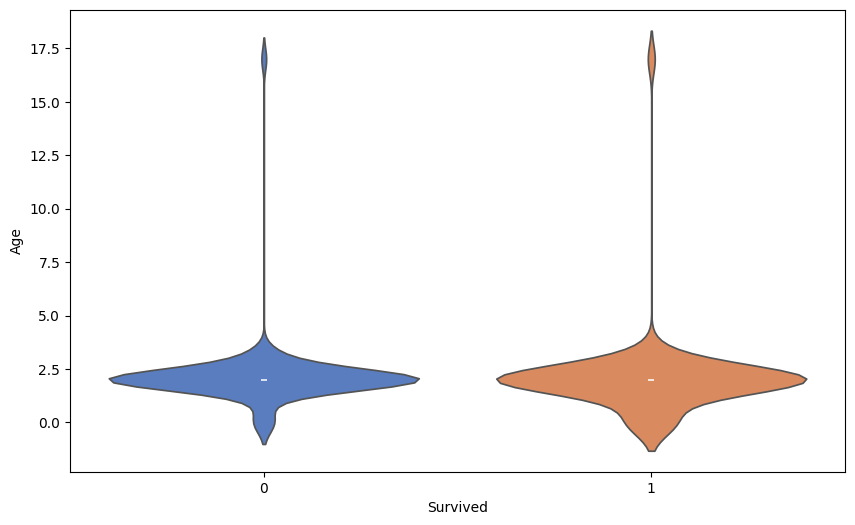

In [8]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='Survived', y='Age', palette="muted")

In [ ]:
#Random forest wiht default values to check accuracy
#figure out why there are values at 17.5
X = df.drop('Survived', axis=1)
y = df['Survived']
#Splits data into 2 seperate parts so we can actually completeeeeeeeee

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#Training?

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
#random forest classifier

y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
#compares the prediction to the actual 


Accuracy: 0.8324022346368715


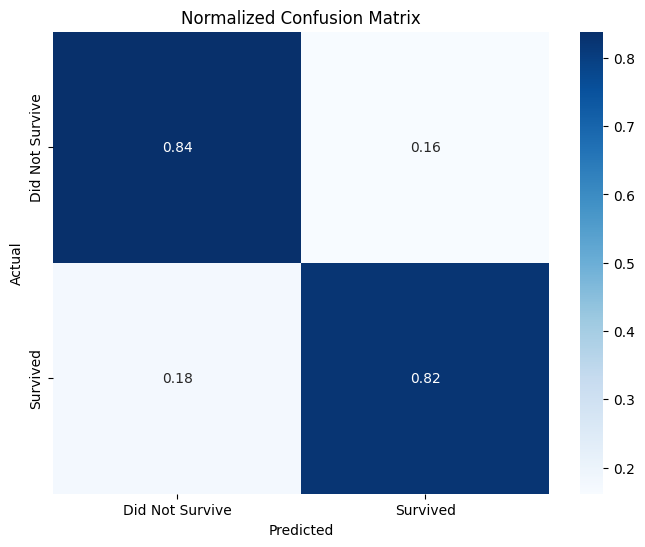

In [ ]:
cm = confusion_matrix(y_test, y_pred)
#Creates confusion matrix

cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(8, 6))
sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues', 
            xticklabels=["Did Not Survive", "Survived"], 
yticklabels=["Did Not Survive", "Survived"])
plt.title("Normalized Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()